# Nilearn - Imaging

In [1]:
import numpy as np
import networkx as nx
import pandas as pd

import scona as scn
import scona.datasets as datasets

In [2]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read in sample data from the NSPN WhitakerVertes PNAS 2016 paper.
df, names, covars, centroids = datasets.NSPN_WhitakerVertes_PNAS2016.import_data()

# calculate residuals of the matrix df for the columns of names
df_res = scn.create_residuals_df(df, names, covars)

# create a correlation matrix over the columns of df_res
M = scn.create_corrmat(df_res, method='pearson')

# Initialise a weighted graph G from the correlation matrix M
G = scn.BrainNetwork(network=M, parcellation=names, centroids=centroids)

# threshold the G graph at the cost 10
G10 = G.threshold(10)

In [9]:
import importlib.util
spec = importlib.util.spec_from_file_location("view_nodes_3d", "/home/pilot/GSoC/scona/scona/brain_plotting.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)

### View Nodes with nilearn

In [10]:
# from scona.nilearn_plotting import view_markers_3d

In [11]:
print("The number of nodes in G10 is", G10.number_of_nodes())

The number of nodes in G10 is 308


In [12]:
foo.view_nodes_3d(G10)

/home/pilot/GSoC/scona/scona/brain_plotting.py:81: DeprecationWarning: The parameter "colors" will be removed in 0.6.0 release of Nilearn. Please use the parameter "marker_color" instead.


### 1) 3d plot of a connectome 

*Note*: In order to produce visualization-heavy projects in jupyter notebook, change the config variable **iopub_data_rate_limit** to arbitrary big number. For example, this could be achieved by running the jupyter with the following command `jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000`

In [4]:
from scona.nilearn_plotting import view_connectome_with_nilearn

/home/pilot/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
print("The number of edges in <G BrainNetwork Object> is", G.number_of_edges())
print("The number of nodes in <G BrainNetwork Object> is", G.number_of_nodes())

The number of edges in <G BrainNetwork Object> is 47278
The number of nodes in <G BrainNetwork Object> is 308


In [6]:
# threshold G at cost 1 to create a binary graph with 1% as many edges as the complete graph G.
G01 = G.threshold(1)

In [7]:
print("The number of edges in <H BrainNetwork Object> is", G01.number_of_edges())
print("The number of nodes in <H BrainNetwork Object> is", G01.number_of_nodes())

The number of edges in <H BrainNetwork Object> is 473
The number of nodes in <H BrainNetwork Object> is 308


In [8]:
view_connectome_with_nilearn(G01)

/home/pilot/anaconda3/lib/python3.6/site-packages/scona/nilearn_plotting.py:129: DeprecationWarning: The parameter "cmap" will be removed in 0.6.0 release of Nilearn. Please use the parameter "edge_cmap" instead.
  marker_size=node_size)
/home/pilot/anaconda3/lib/python3.6/site-packages/scona/nilearn_plotting.py:129: DeprecationWarning: The parameter "threshold" will be removed in 0.6.0 release of Nilearn. Please use the parameter "edge_threshold" instead.
  marker_size=node_size)
/home/pilot/anaconda3/lib/python3.6/site-packages/scona/nilearn_plotting.py:129: DeprecationWarning: The parameter "marker_size" will be removed in 0.6.0 release of Nilearn. Please use the parameter "node_size" instead.
  marker_size=node_size)


In [9]:
G.nodes[0]

{'centroids': array([-56.40355 , -40.152663,   1.708876]),
 'name': 'lh_bankssts_part1',
 'x': -56.40355,
 'y': -40.152663,
 'z': 1.708876}

In [10]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 60), (0, 61), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 71), (0, 72), (0, 73), (0, 74), (0, 75), (0, 76), (0, 77), (0, 78), (0, 79), (0, 80), (0, 81), (0, 82), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 96), (0, 97), (0, 98), (0, 99), (0, 100), (0, 101), (0, 102), (0, 103), (0, 104), (0, 105), (0, 106), (0, 107), (0, 108), (0, 109), (0, 110)

In [11]:
G.edges[0,1]

{'weight': 0.579735609734101}

In [12]:
G.edges[299, 305]

{'weight': 0.24026580067367578}

In [13]:
G01.edges[0,1]

{'weight': 1}

In [14]:
G01.edges([0,1])

EdgeDataView([(0, 1), (0, 57), (0, 133), (0, 54), (1, 17)])

In [19]:
G01.edges.data()

EdgeDataView([(0, 1, {'weight': 1}), (0, 57, {'weight': 1}), (0, 133, {'weight': 1}), (0, 54, {'weight': 1}), (1, 17, {'weight': 1}), (2, 97, {'weight': 1}), (3, 116, {'weight': 1}), (3, 118, {'weight': 1}), (3, 104, {'weight': 1}), (3, 111, {'weight': 1}), (3, 5, {'weight': 1}), (3, 276, {'weight': 1}), (3, 120, {'weight': 1}), (3, 100, {'weight': 1}), (3, 114, {'weight': 1}), (3, 106, {'weight': 1}), (3, 272, {'weight': 1}), (4, 88, {'weight': 1}), (4, 119, {'weight': 1}), (4, 6, {'weight': 1}), (4, 141, {'weight': 1}), (4, 86, {'weight': 1}), (4, 273, {'weight': 1}), (4, 85, {'weight': 1}), (4, 111, {'weight': 1}), (4, 271, {'weight': 1}), (4, 157, {'weight': 1}), (5, 155, {'weight': 1}), (5, 111, {'weight': 1}), (5, 114, {'weight': 1}), (6, 157, {'weight': 1}), (6, 244, {'weight': 1}), (6, 276, {'weight': 1}), (6, 120, {'weight': 1}), (6, 104, {'weight': 1}), (6, 85, {'weight': 1}), (7, 161, {'weight': 1}), (7, 8, {'weight': 1}), (7, 70, {'weight': 1}), (7, 47, {'weight': 1}), (8, 

## Plot connectome with nilearn

In [4]:
G01 = G.threshold(1)

In [5]:
G01.number_of_edges()

473

In [10]:
import importlib.util
spec = importlib.util.spec_from_file_location("plot_connectome", "/home/pilot/GSoC/scona/scona/visualisations.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)

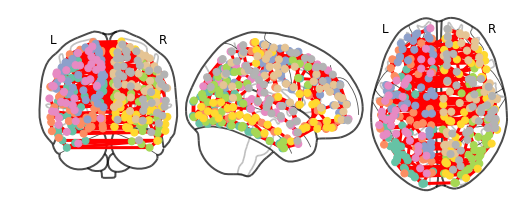

In [11]:
test = foo.plot_connectome(G01)

In [15]:
##########

In [18]:
# make ordered nodes to produce ordered rows and columns in adjacency matrix

node_order = sorted(list(G01.nodes()))

In [19]:
# Return the graph adjacency matrix as a NumPy matrix.

adjacency_matrix = nx.convert_matrix.to_numpy_matrix(G01, nodelist=node_order)

In [25]:
adjacency_matrix

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.]])

In [23]:
adjacency_matrix.shape

(308, 308)

In [26]:
np.save("Adj_matrix", adjacency_matrix)

In [27]:
# store nodes coordinates in NumPy array

node_coords = np.array([G._node[node]["centroids"] for node in node_order])

In [31]:
node_coords.shape

(308, 3)

In [28]:
np.save("Centroids", node_coords)

In [11]:
from nilearn import plotting

TypeError: Only length-1 arrays can be converted to Python scalars

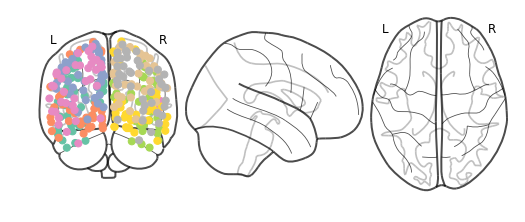

In [30]:
plotting.plot_connectome(adjacency_matrix, node_coords)

In [32]:
#################

### SubGraph

In [14]:
W = G01.subgraph([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [15]:
W.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))

In [16]:
W.nodes[0]

{'centroids': array([-56.40355 , -40.152663,   1.708876]),
 'name': 'lh_bankssts_part1',
 'x': -56.40355,
 'y': -40.152663,
 'z': 1.708876}

In [17]:
W.edges()

EdgeView([(0, 1), (3, 5), (4, 6), (7, 8)])

In [95]:
# To “unfreeze” a graph you must make a copy by creating a new graph object:
Q_warm = nx.Graph(Q)

In [47]:
from nilearn import plotting

In [18]:
adj_mat = nx.convert_matrix.to_numpy_array(W)

In [19]:
adj_mat

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
node_coords = np.array([W.node[node]["centroids"] for node in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]])

In [21]:
node_coords

array([[-56.40355 , -40.152663,   1.708876],
       [-53.140506, -49.843038,   8.264557],
       [ -5.001684,  20.645903,  25.733446],
       [-33.265925,  20.200202,  45.347826],
       [-31.958115,   2.146597,  51.26911 ],
       [-38.795007,  12.584757,  33.278581],
       [-39.715079,  11.341351,  48.846438],
       [ -8.609127, -73.360119,  17.095238],
       [ -5.3042  , -87.102157,  19.323496],
       [-24.010774,  -5.86141 , -32.826641],
       [-30.237677, -46.493585, -17.452397]])

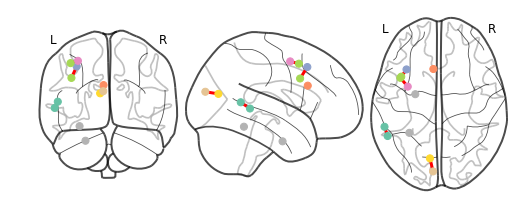

In [28]:
plotting.plot_connectome(adj_mat, node_coords)

### Set linewidth=1

In [70]:
edge_kwargs = {}

edge_kwargs["linewidth"] = 1.

In [73]:
plotting.plot_connectome(adj_mat, node_coords, edge_kwargs=edge_kwargs)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

#### Try to have only nodes with edges

In [74]:
Q = G01.subgraph([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [75]:
Q.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))

In [76]:
Q.edges()

EdgeView([(0, 1), (3, 5), (4, 6), (7, 8)])

In [78]:
# To “unfreeze” a graph you must make a copy by creating a new graph object:
Q_warm = nx.Graph(Q)

In [79]:
Q_warm.remove_node(2)

In [80]:
Q_warm.remove_node(9)

In [81]:
Q_warm.remove_node(10)

In [82]:
Q_warm.nodes()

NodeView((0, 1, 3, 4, 5, 6, 7, 8))

In [83]:
Q_warm.edges()

EdgeView([(0, 1), (3, 5), (4, 6), (7, 8)])

In [90]:
adj_mat3 = nx.convert_matrix.to_numpy_matrix(Q_warm)

In [91]:
node_coords3 = np.array([Q_warm.node[node]["centroids"] for node in [0, 1, 3, 4, 5, 6, 7, 8]])

In [92]:
adj_mat3.shape

(8, 8)

In [93]:
node_coords.shape

(8, 3)

TypeError: Only length-1 arrays can be converted to Python scalars

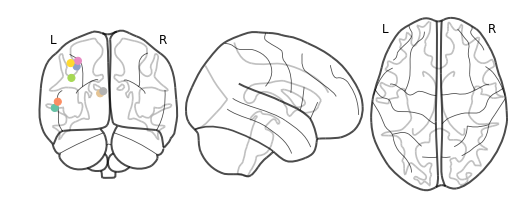

In [94]:
plotting.plot_connectome(adj_mat3, node_coords3)

### Change weights to be not the same 1

In [98]:
for edge in Q_warm.edges():
    print(Q_warm.edges[edge]["weight"])

1
1
1
1


In [100]:
Q_warm.edges()

EdgeView([(0, 1), (3, 5), (4, 6), (7, 8)])

In [103]:
Q_warm.edges[0,1]["weight"] = 0.7

In [104]:
Q_warm.edges[3,5]["weight"] = 0.4

In [105]:
Q_warm.edges[4,6]["weight"] = 0.66

In [106]:
Q_warm.edges[7,8]["weight"] = 1

In [107]:
for edge in Q_warm.edges():
    print(Q_warm.edges[edge]["weight"])

0.7
0.4
0.66
1


In [108]:
adj_mat4 = nx.convert_matrix.to_numpy_matrix(Q_warm)

In [110]:
Q_warm.nodes()

NodeView((0, 1, 3, 4, 5, 6, 7, 8))

In [111]:
node_coords4 = np.array([Q_warm.node[node]["centroids"] for node in [0, 1, 3, 4, 5, 6, 7, 8]])

TypeError: Only length-1 arrays can be converted to Python scalars

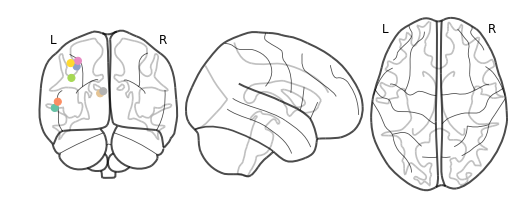

In [112]:
plotting.plot_connectome(adj_mat4, node_coords4)

### HELP FROM NILEARN COMMUNITY

In [7]:
G01 = G.threshold(1)

In [8]:
# Returns the graph adjacency matrix as a NumPy array.

adjacency_matrix = nx.convert_matrix.to_numpy_array(G01)

In [9]:
# make ordered nodes to produce ordered rows and columns in adjacency matrix

node_order = sorted(list(G01.nodes()))

In [10]:
# store nodes coordinates in NumPy array

node_coords = np.array([G01.node[node]["centroids"] for node in node_order])

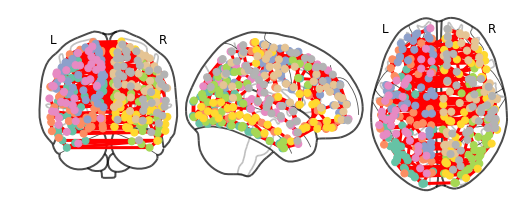

In [12]:
plotting.plot_connectome(adjacency_matrix, node_coords)

In [13]:
G01.number_of_edges()

473

### Graph Theory

In [54]:
G = nx.Graph()

In [55]:
G.add_nodes_from([1,2,3,4,5])

In [56]:
G.nodes()

NodeView((1, 2, 3, 4, 5))

In [57]:
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

In [58]:
G.edges()

EdgeView([(1, 2), (1, 5), (2, 3), (3, 4), (4, 5)])

In [59]:
G.add_edge(5,1)

In [72]:
G.edges()

EdgeView([(1, 2), (1, 5), (2, 3), (3, 4), (4, 5)])

In [61]:
# Returns the graph adjacency matrix as a NumPy array

adj = nx.to_numpy_array(G)

In [62]:
adj

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [40]:
import matplotlib.pyplot as plt

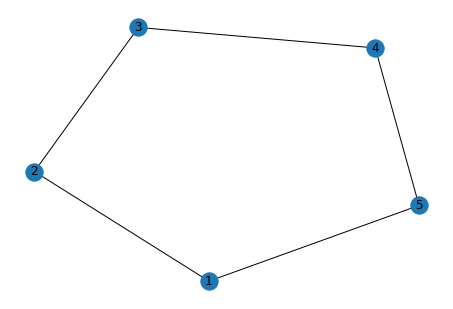

In [63]:
nx.draw(G, with_labels=True)

In [64]:
incid_mat = nx.incidence_matrix(G)

In [65]:
incid_mat.toarray()

array([[1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1.],
       [0., 1., 0., 0., 1.]])

In [66]:
type(incid_mat)

scipy.sparse.csc.csc_matrix

In [71]:
incid_mat.getcol(0).toarray()

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.]])